In [114]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import datetime 

In [115]:
listing=pd.read_csv("C:/Users/SAMYAK/OneDrive/Desktop/Data Science/listings.csv")
calendar=pd.read_csv("C:/Users/SAMYAK/OneDrive/Desktop/Data Science/calendar.csv")

Understanding The Data

In [116]:
listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [117]:
listing.shape

(3585, 95)

In [118]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [119]:
np.sum(listing.isnull()).sort_values(ascending=False)/listing.shape[0]

has_availability                1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
square_feet                     0.984379
                                  ...   
is_location_exact               0.000000
room_type                       0.000000
accommodates                    0.000000
bed_type                        0.000000
country                         0.000000
Length: 95, dtype: float64

In [120]:
#drop the columns havng null values
listing.drop(["has_availability","license","neighbourhood_group_cleansed","jurisdiction_names","square_feet"],axis=1,inplace=True)

In [121]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [122]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [123]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [124]:
np.sum(calendar.isnull())/calendar.shape[0]

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [125]:
listing["price"]=listing["price"].str.replace("$","")
listing["price"]=listing["price"].str.replace(",","")

C:\Users\SAMYAK\AppData\Local\Temp/ipykernel_8732/2237261118.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing["price"]=listing["price"].str.replace("$","")


In [126]:
listing["price"]=listing["price"].astype(float)

In [127]:
calendar["available"]=calendar["available"].replace({"t":1,"f":0})
calendar["available"]=calendar["available"].astype(int)

In [128]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


In [129]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


In [130]:
neighbourhood=listing.neighbourhood.value_counts().sort_values(ascending=False)
neighbourhood

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

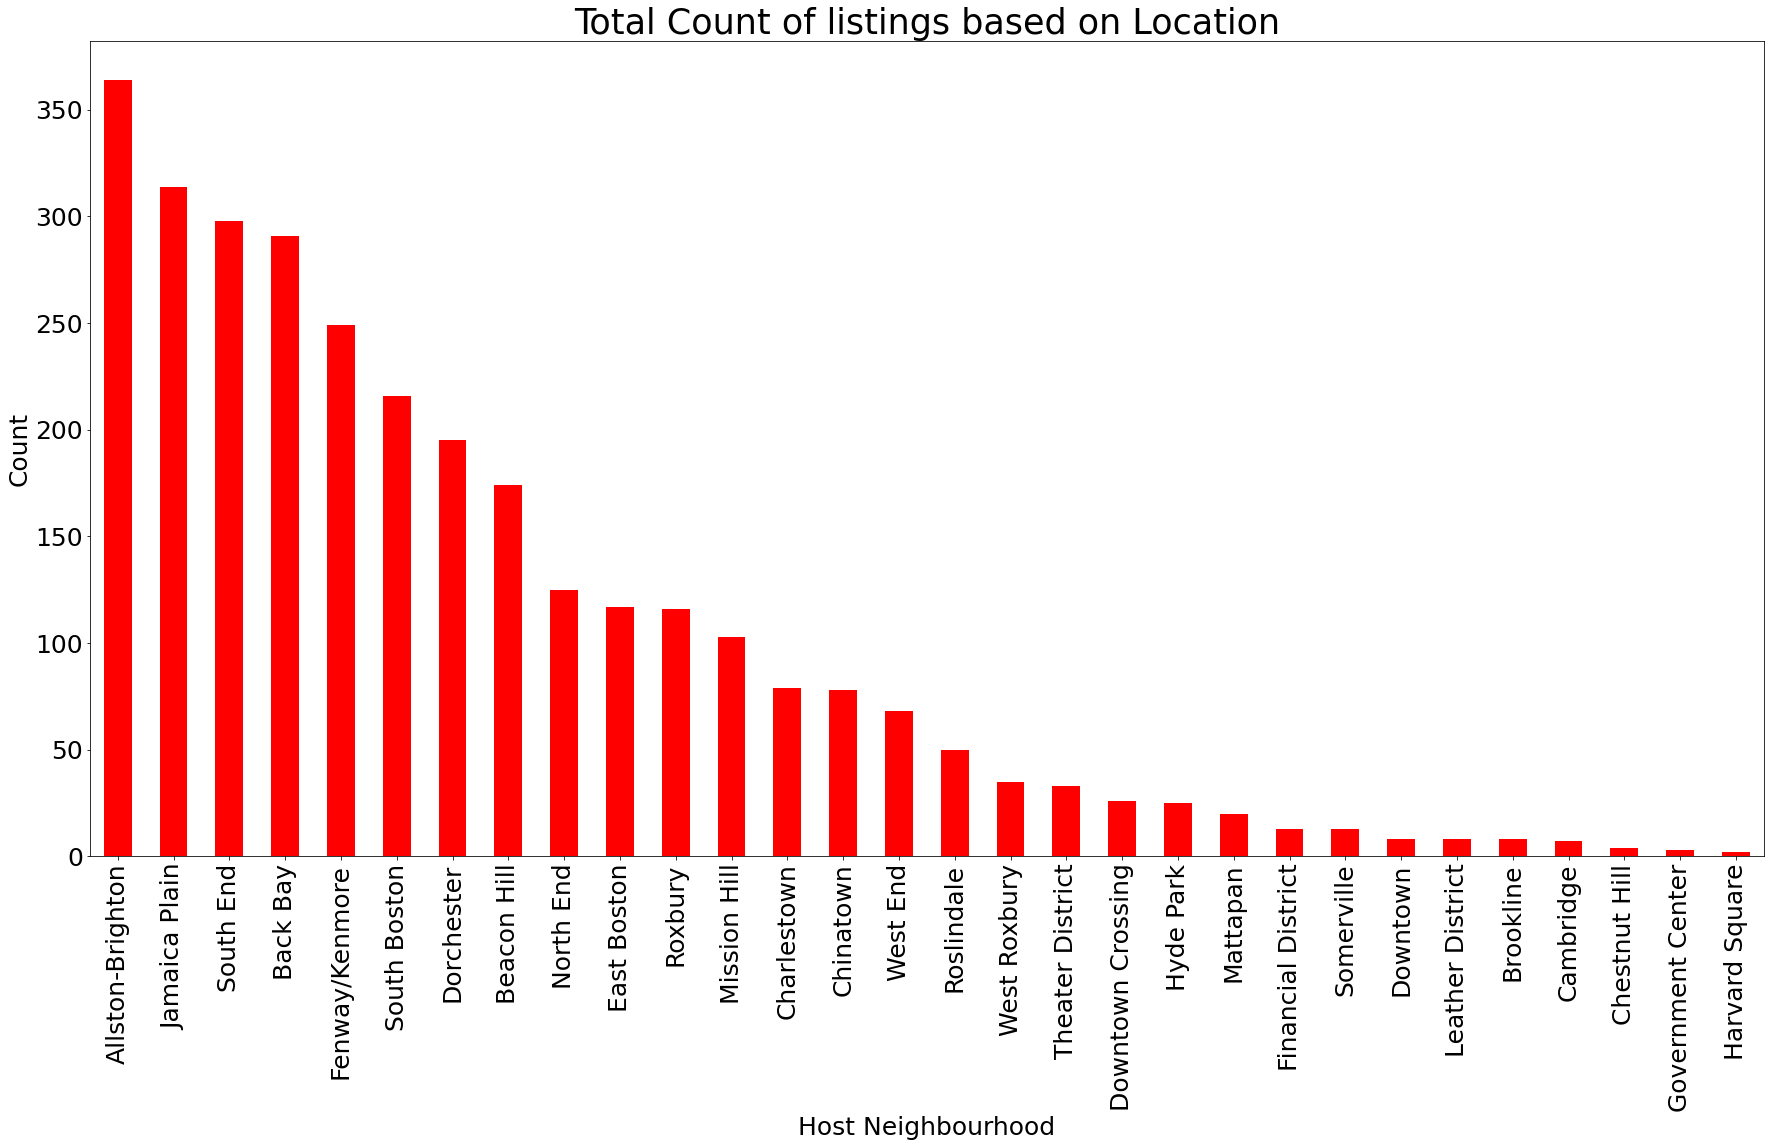

In [131]:
fig=plt.figure(figsize=(30,15))
neighbourhood=neighbourhood[:].plot(kind="bar",color="r")
plt.xlabel("Host Neighbourhood",size=25)
plt.ylabel("Count",size=25)
plt.title("Total Count of listings based on Location",size=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

1)which location is most prefered by Guests

In [132]:
np.sum(listing["availability_90"].isnull())

0

In [133]:
listing['booking_ratio_90'] = 1 - (listing['availability_90']/90)
listing['booking_ratio_90'].head()

0    1.000000
1    0.066667
2    0.322222
3    0.711111
4    0.344444
Name: booking_ratio_90, dtype: float64

In [134]:
neighbourhood=listing.groupby(["neighbourhood"])["booking_ratio_90"].mean().sort_values(ascending=False).head(10)
neighbourhood.head()

neighbourhood
Financial District    0.864103
Beacon Hill           0.715837
North End             0.710933
Harvard Square        0.677778
Allston-Brighton      0.673321
Name: booking_ratio_90, dtype: float64

Text(0.5, 1.0, 'Booking Ratio of hosts located in neighbourhood of Boston')

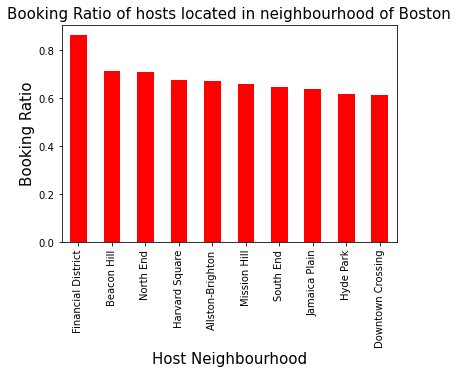

In [135]:
neighbourhood.plot(kind="bar",color="r")
plt.xlabel("Host Neighbourhood",size=15)
plt.ylabel("Booking Ratio",size=15)
plt.title("Booking Ratio of hosts located in neighbourhood of Boston",size=15)


2)What type of property is prefered by customers

In [136]:
property_type=listing.groupby(["property_type"])["booking_ratio_90"].mean().sort_values(ascending=False).head(10)
property_type.head()

property_type
Villa          0.888889
Dorm           0.850000
Loft           0.663248
Condominium    0.660991
Apartment      0.577165
Name: booking_ratio_90, dtype: float64

Text(0.5, 1.0, 'Booking Ratio of Properties')

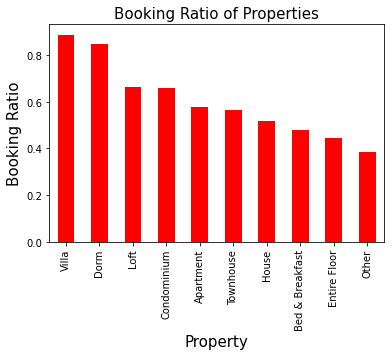

In [137]:
property_type.plot(kind="bar",color="r")
plt.xlabel("Property",size=15)
plt.ylabel("Booking Ratio",size=15)
plt.title("Booking Ratio of Properties",size=15)

4)How does price vary in the neighbourhood of Boston?

In [138]:
price_compare=listing.groupby(["neighbourhood"])["price"].mean().sort_values(ascending=False)
price_compare

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     273.500000
Leather District      245.875000
Back Bay              245.457045
Chinatown             235.410256
Theater District      234.151515
South Boston          232.120370
Fenway/Kenmore        230.104418
West End              221.602941
Beacon Hill           212.080460
Charlestown           210.050633
South End             206.721477
Government Center     205.333333
Cambridge             203.000000
Downtown              196.500000
North End             195.512000
Roxbury               147.637931
Jamaica Plain         140.687898
Brookline             130.375000
Mission Hill          127.805825
East Boston           124.059829
Allston-Brighton      114.162088
West Roxbury          111.342857
Roslindale             99.160000
Dorchester             97.451282
Hyde Park              93.680000
Somerville             93.076923
Mattapan               72.000000
Chestnut Hill          70.750

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

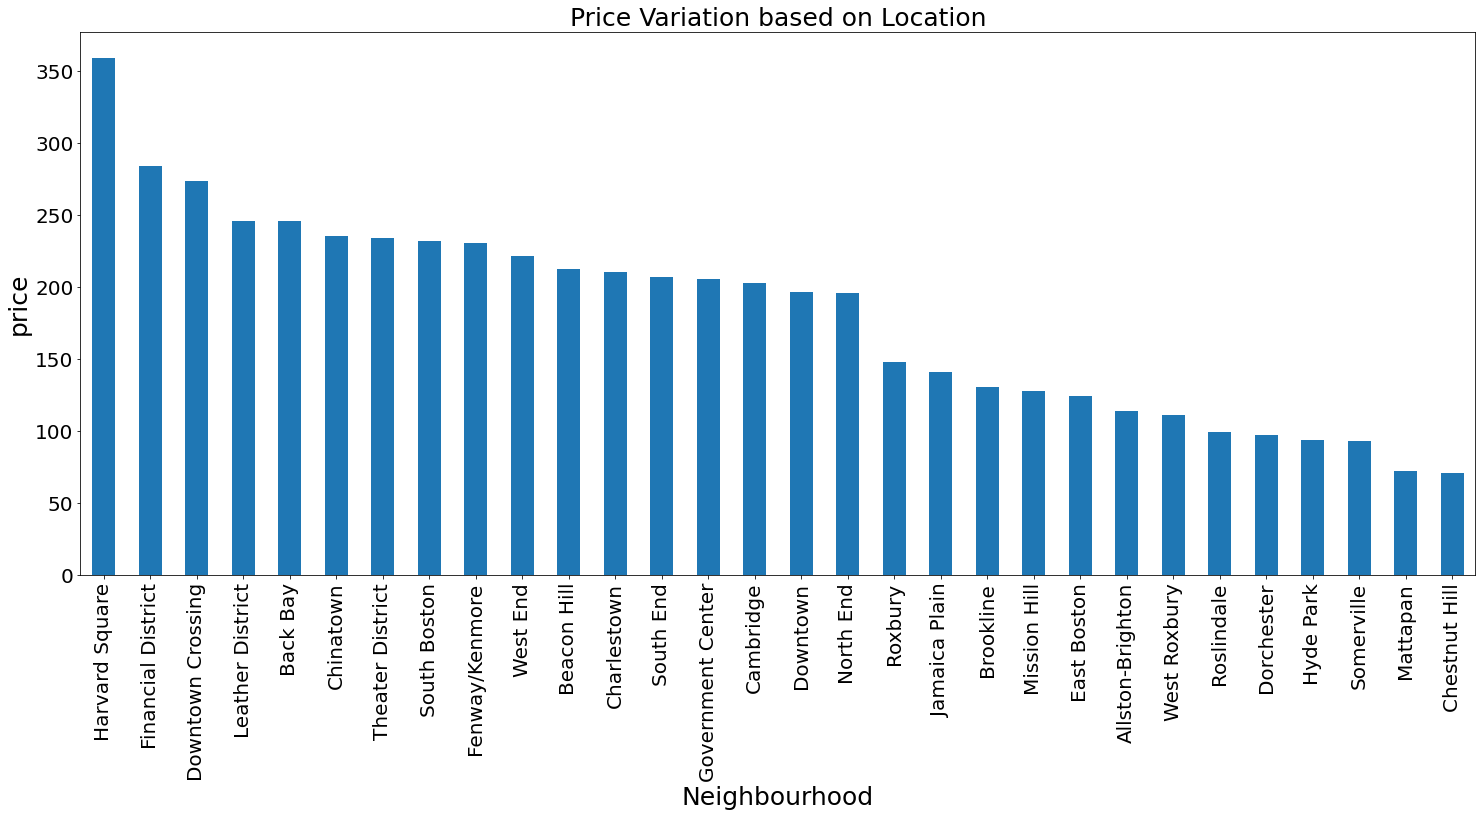

In [139]:
fig=plt.figure(figsize=(25,10))
price_compare.plot(kind="bar");
plt.xlabel("Neighbourhood",size=25)
plt.ylabel("price",size=25)
plt.title("Price Variation based on Location",size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

5)Which host is the most popular among visitors?

In [140]:
list_count=listing[["id","number_of_reviews"]].nlargest(10, 'number_of_reviews')
list_count

,id,number_of_reviews
414,66288,404
1637,1497879,320
1460,414419,312
2809,31796,291
642,916123,281
679,815639,281
292,1136972,280
1658,20000,271
2229,1695275,252
667,766700,244


5)Analyse the supply and demand of hosts in the boston region

In [141]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


In [142]:
calendar.shape

(1308890, 4)

In [143]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  int32 
 3   price       643037 non-null   object
dtypes: int32(1), int64(1), object(2)
memory usage: 35.0+ MB


In [144]:
calendar.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [145]:
calendar.price.describe()

count      643037
unique       1246
top       $150.00
freq        20752
Name: price, dtype: object

In [146]:
calendar["price"]=calendar["price"].str.replace("$","")
calendar["price"]=calendar["price"].str.replace(",","")

C:\Users\SAMYAK\AppData\Local\Temp/ipykernel_8732/3991000855.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar["price"]=calendar["price"].str.replace("$","")


In [147]:
calendar["price"]=calendar["price"].astype(float)

In [148]:
# str to datetime
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
# str to float type and remove sign
def rid_sign(x,sign):
    """
    This function takes variable value and remove them 
    and return it as float type.
    """
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [149]:
calendar['date'] =calendar['date'].apply(to_datetime)

In [150]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  int32         
 3   price       643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 35.0 MB


In [151]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,0,NaN
1,12147973,2017-09-04,0,NaN
2,12147973,2017-09-03,0,NaN
3,12147973,2017-09-02,0,NaN
4,12147973,2017-09-01,0,NaN


In [152]:
avaliable_houses = calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
avaliable_houses = avaliable_houses.rename({"price":"available_houses"},axis='columns')

In [153]:
# everyday average prices
calendar_open = calendar[calendar.price.notnull()]
# average house price for boston everyday
average_price = calendar_open.groupby('date').mean()[['price']]
# change column name
average_price = average_price.rename({"price":"average_prices"},axis='columns')

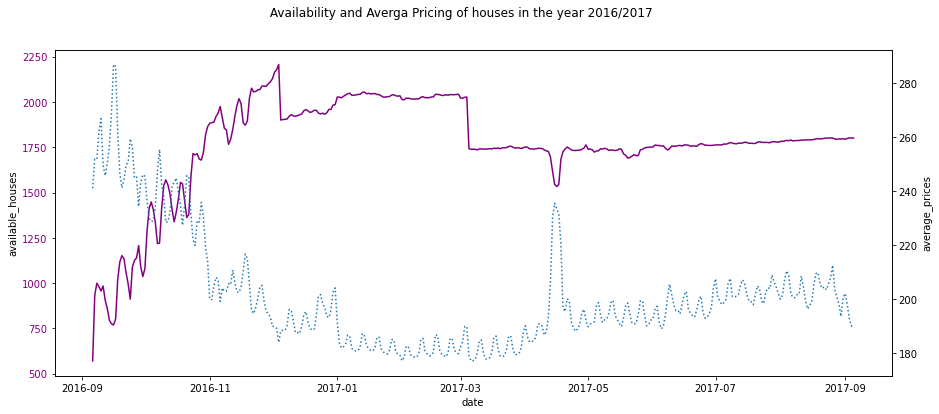

In [154]:
# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_houses.index,y = 'available_houses', 
                  data = avaliable_houses,color="purple",legend=False)
for tl in ax.get_yticklabels():
    tl.set_color('purple')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price.index,y = 'average_prices',
             data=average_price,ax=ax2,linestyle=':', legend=False)
plt.suptitle(" Availability and Averga Pricing of houses in the year 2016/2017")
f.savefig('BusinessTrend',bbox_inches='tight')
